<a href="https://colab.research.google.com/github/IvanKatorgin/Python-libraries-for-data-analysis/blob/main/%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B8_Python_%D0%B4%D0%BB%D1%8F_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курс "Библиотеки Python для анализа данных". Домашнее задание 2. Функции и работа с данными. Каторгин И.П.

Задание 1.

Напишите функцию, которая классифицирует фильмы из материалов занятия по правилам:

оценка 2 и ниже — низкий рейтинг;

оценка 4 и ниже — средний рейтинг;

оценка 4.5 и 5 — высокий рейтинг.

Результат классификации запишите в столбец class.

In [ ]:
import pandas as pd

In [ ]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
mean = ratings.groupby('movieId').agg({'rating':'mean'}).reset_index()
mean.head()

,movieId,rating
0,1,3.872470
1,2,3.401869
2,3,3.161017
3,4,2.384615
4,5,3.267857


In [ ]:
joined = mean.merge(movies, on = 'movieId', how = 'left')
joined.head()

,movieId,rating,title,genres
0,1,3.872470,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.401869,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.161017,Grumpier Old Men (1995),Comedy|Romance
3,4,2.384615,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,3.267857,Father of the Bride Part II (1995),Comedy


In [ ]:
def rating_film(row):
  if float(row['rating']) <= 2:
    return 'низкий рейтинг'
  if float(row['rating']) <= 4:
    return 'средний рейтинг'
  return 'высокий рейтинг'

In [ ]:
joined['class'] = joined.apply(rating_film, axis=1)
joined.head()

,movieId,rating,title,genres,class
0,1,3.872470,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,средний рейтинг
1,2,3.401869,Jumanji (1995),Adventure|Children|Fantasy,средний рейтинг
2,3,3.161017,Grumpier Old Men (1995),Comedy|Romance,средний рейтинг
3,4,2.384615,Waiting to Exhale (1995),Comedy|Drama|Romance,средний рейтинг
4,5,3.267857,Father of the Bride Part II (1995),Comedy,средний рейтинг


Задание 2.

Используйте файл keywords.csv.

Нужно написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определённому региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.



In [ ]:
keywords = pd.read_csv('keywords.csv')
keywords.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [ ]:
geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск'] }

Вариант 1

In [ ]:
def find_region(row):
  for region in geo_data.items():
    for city in region[1]:
      if city in row['keyword']:
        return  region[0]
  return 'undefined'

In [ ]:
keywords['region'] = keywords.apply(find_region, axis=1)
keywords.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [ ]:
keywords[(keywords['region'] == 'Центр')].head()

,keyword,shows,region
127,авито москва,979292,Центр
849,авито ярославль,209581,Центр
1259,москва,153050,Центр
1396,гисметео москва,140279,Центр
1482,госуслуги москва,133061,Центр


In [ ]:
keywords[(keywords['region'] == 'Северо-Запад')].head()

,keyword,shows,region
370,авито ру санкт петербург,425134,Северо-Запад
564,погода в санкт петербурге,292489,Северо-Запад
1236,банк санкт петербург,174375,Северо-Запад
1346,санкт петербург,144232,Северо-Запад
2121,электронный дневник санкт петербургского образ...,94835,Северо-Запад


In [ ]:
keywords[(keywords['region'] == 'Дальний Восток')].head()

,keyword,shows,region
1063,фарпост владивосток,176951,Дальний Восток
2175,дром хабаровск,98361,Дальний Восток
3206,дром владивосток,73084,Дальний Восток
3275,100 сп владивосток,76418,Дальний Восток
3687,авито хабаровск,63736,Дальний Восток


In [ ]:
keywords[(keywords['region'] == 'undefined')].head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [ ]:
keywords[(keywords['region']!='undefined')].head()

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
564,погода в санкт петербурге,292489,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток


Вариант 2

In [ ]:
city_=[]
for regions in geo_data.values():
  for i in regions:
    city_.append(i)
city_

['москва',
 'тула',
 'ярославль',
 'петербург',
 'псков',
 'мурманск',
 'владивосток',
 'сахалин',
 'хабаровск']

In [ ]:
row='фарпост владивосток'
data=row.split(' ')
def check(c):
  for i in c:
    if i in city_:
      for items in geo_data.items():
        if i in items[1]:
          print(items[0])
check(data)

Дальний Восток


In [ ]:
def find_region_(row):
  data=row['keyword'].split(' ')
  i=0
  for word in data:
    if word in city_:
      for items in geo_data.items():
        if word in items[1]:
          i+=1
          return items[0]
  if i==0:
    return 'undefined'

In [ ]:
keywords['region'] = keywords.apply(find_region_, axis=1)
keywords.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [ ]:
keywords[(keywords['region']!='undefined')].head()

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток
1236,банк санкт петербург,174375,Северо-Запад


Задание 3 (бонусное).

Есть мнение, что раньше снимали настоящее кино, не то что сейчас. Ваша задача — проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия: файл movies.csv и ratings.csv из базы. Нужно проверить, верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

Вы не будете затрагивать субьективные факторы выставления этих рейтингов, а пройдётесь по алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010 года.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте алгоритм:

  1. для каждой строки пройдите по всем годам списка years;

  2. если номер года присутствует в названии фильма, то функция возвращает этот год, как год выпуска;

  3. если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год.

3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’.

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга.

In [ ]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
years = [] # создание списка для дальнейшего заполнения его годами
start_date = 1949
end_date = 2010

# наполняется список года между 1950 и 2010
while start_date < end_date:
  start_date = start_date + 1
  years.append(str(start_date))

years[0:5]

['1950', '1951', '1952', '1953', '1954']

In [ ]:
def production_year(movies):
  for year in years:
    if year in movies:
      return year
  return '1990'

In [ ]:
movies['year'] = movies['title'].apply(production_year)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [ ]:
joined = ratings.merge(movies, on = 'movieId', how = 'left')
joined.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,1995
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical,1990
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,1996
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,1981
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,1989


In [ ]:
mean = joined.groupby('year').agg({'rating':'mean'}).reset_index()
mean.sort_values(by='rating', ascending=False)

,year,rating
7,1957,4.014241
22,1972,4.011136
2,1952,4.000000
4,1954,3.994220
1,1951,3.983539
...,...,...
55,2005,3.448434
53,2003,3.444777
46,1996,3.426600
47,1997,3.415764


Python подсказал, что можно построить график:

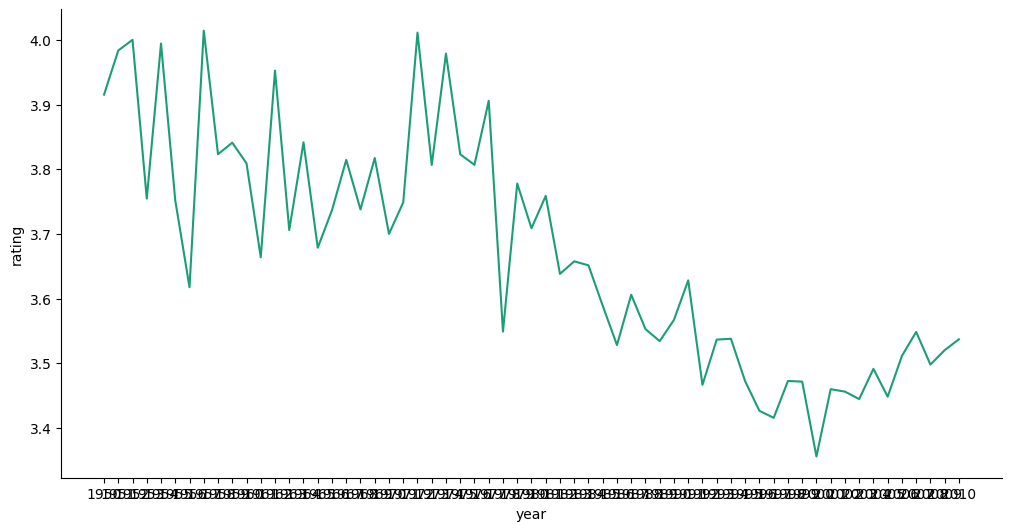

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['rating']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('rating')

Вывод:

В целом наблюдается нисходящий тренд - чем позже год выпуска фильма, тем ниже его рейтинг. Гипотеза подтвердилась